In [28]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from tqdm import tqdm


### 1. Basic graph attributes: how many nodes and (undirected) edges are in this net-work?

In [11]:
import networkx as nx

# Create an empty graph
AIRG = nx.Graph()

city_name_dict = {}  # Create a dictionary to map node IDs to city names

with open("./airports/global-cities.dat", "r") as f:
    for line in f:
        parts = line.strip().split("|")
        if len(parts) >= 3:
            node_id = parts[1].strip()
            city_name = parts[2].strip()
            city_name_dict[node_id] = city_name
            AIRG.add_node(node_id, city=city_name) 

with open("./airports/global-net.dat", "r") as f:
    for line in f:
        parts = line.strip().split()
        if len(parts) >= 2:  # Validate data
            u, v = parts[0], parts[1]
            # Only add an edge if both nodes exist (optional protection logic)
            if u in city_name_dict and v in city_name_dict:
                AIRG.add_edge(u, v)
            else:
                print(f"Warning: Ignored invalid edge {u}-{v} (node does not exist)")

# Output statistics
print(f"\nFinal network contains:")
print(f"- Number of nodes: {AIRG.number_of_nodes()}")
print(f"- Number of edges: {AIRG.number_of_edges()}")



Final network contains:
- Number of nodes: 3883
- Number of edges: 14142


### 2. How many connected components are in this graph, how many nodes and edges do the largest component contain?

In [12]:
num_components = nx.number_connected_components(AIRG)

largest_component = AIRG.subgraph(max(nx.connected_components(AIRG), key=len))

largest_nodes = largest_component.number_of_nodes()
largest_edges = largest_component.number_of_edges()


print(num_components)
print("largest nodes:",  largest_nodes)
print("largest_edges:", largest_edges)

266
largest nodes: 3618
largest_edges: 14142


### 3. Denote the largest component as G. List the top 10 nodes in G having the highest degree, and how many other nodes are they connected to. Please give names of the city/airport, node ids will not be accepted.

In [ ]:
G = largest_component

degrees = dict(G.degree())
top_nodes = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:10]

for node_id, degree in top_nodes:
    city_name = G.nodes[node_id]["city"]
    print(city_name, degree)

Paris 250
London (GB) 242
Frankfurt 237
Amsterdam 192
Moscow 186
Chicago 184
New York 179
Atlanta 172
Dallas/Fort Worth 147
Houston 144


### 4. Plot the degree distribution of the network G. Each data point is a pair (x,y) where x is a positive integer and y is the fraction of nodes in the network with degree equal to x. Also plot the degree distribution on a log-log scale. Restrict the range of x between the minimum and maximum degrees. You may filter out data points with a 0 entry. For the log-log scale, use base 10 for both x and y axes. Include numeric labels on each axes for the reader to make sense of the plot.

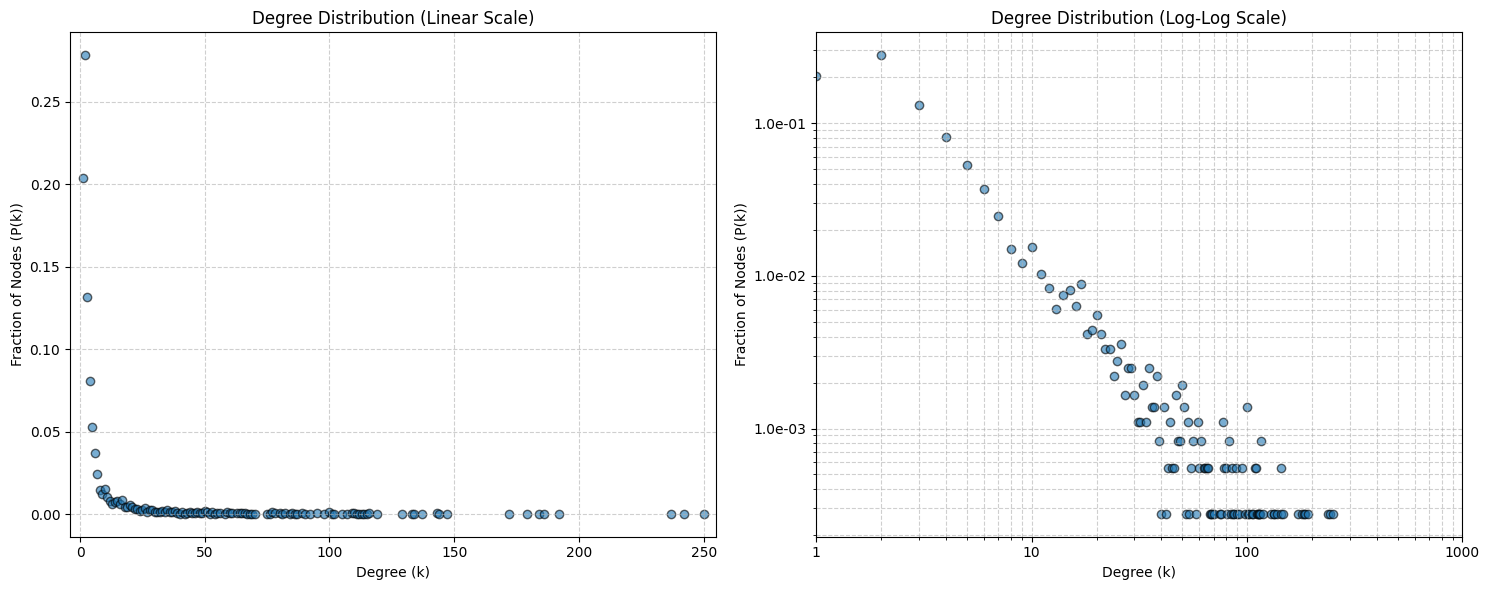

In [25]:
# Extract degrees of nodes in the graph G
degrees = [d for _, d in G.degree()]

# Compute degree distribution
degree_counts = Counter(degrees)
min_deg = min(degrees)
max_deg = max(degrees)

# Generate (x, y) data points
x = []
y = []
for deg in range(min_deg, max_deg + 1):
    count = degree_counts.get(deg, 0)
    if count > 0:
        x.append(deg)
        y.append(count / len(degrees))  # Fraction of nodes with this degree

# Create a figure with two subplots (side-by-side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# ----------------------------
# Linear scale plot
ax1.scatter(x, y, alpha=0.6, edgecolor='k')
ax1.set_title("Degree Distribution (Linear Scale)")
ax1.set_xlabel("Degree (k)")
ax1.set_ylabel("Fraction of Nodes (P(k))")
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.set_xlim(min_deg - 5, max_deg + 5)


# ----------------------------
# Log-log scale plot
ax2.scatter(x, y, alpha=0.6, edgecolor='k')
ax2.set_title("Degree Distribution (Log-Log Scale)")
ax2.set_xlabel("Degree (k)")
ax2.set_ylabel("Fraction of Nodes (P(k))")
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.grid(True, linestyle='--', which='both', alpha=0.6)
ax2.set_xlim(10**0, 10**np.ceil(np.log10(max_deg)))

# Format logarithmic ticks
ax2.xaxis.set_major_formatter(plt.ScalarFormatter())
ax2.yaxis.set_major_formatter(plt.FormatStrFormatter('%.1e'))

# ----------------------------
plt.tight_layout()
plt.savefig('degree_distribution.png', dpi=300)
plt.show()


### What is the (unweighted) diameter of the giant component G in this network? List a longest (unweighted) shortest path between two cities. Please give names of the city/airport, node ids will not be accepted. (1 point)

In [ ]:

peripheral_nodes = nx.periphery(G)
max_length = 0
longest_path = []

print("开始计算最长路径...")

# 外层循环添加进度条
for u in tqdm(peripheral_nodes, desc="遍历边缘节点对"):
    for v in peripheral_nodes:
        if u != v:
            path = nx.shortest_path(G, u, v)
            if len(path) - 1 > max_length:
                max_length = len(path) - 1
                longest_path = path

# 转换为城市名称
city_path = [G.nodes[node]["city"] for node in longest_path]

print(f"\n直径长度: {max_length}")
print("最长路径:")
print(" → ".join(city_path))

KeyboardInterrupt: 